## Övning 5.1

Uppgiften lyder
<img src="img/exe5.1.png">

In [4]:
import pandas as pd
import numpy as np

stickprov = [[1.4,3.8,7.5,10.2,11.7,15.0],[2.4,2.5,1.3,1.3,0.7,1.2]]
data = pd.DataFrame(np.transpose(stickprov),columns=["Distans","Kvicksilver"])
data

,Distans,Kvicksilver
0,1.4,2.4
1,3.8,2.5
2,7.5,1.3
3,10.2,1.3
4,11.7,0.7
5,15.0,1.2


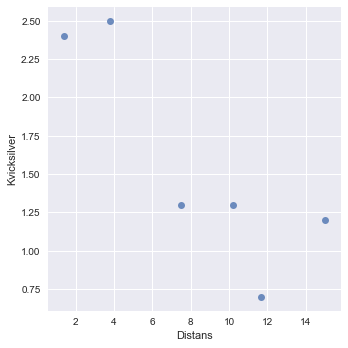

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
g = sns.lmplot(data=data,x="Distans",y="Kvicksilver",fit_reg=False)


Vi gör elementvis summering, för att bestämma regressions koefficienter enl ekvation 5.4.1 och 5.4.2.

In [6]:
antal, sum_x, sum_y = 0,.0,.0
for row in data.itertuples():
    sum_x += row[1]
    sum_y += row[2]
    antal += 1
mean_x,mean_y = sum_x/antal, sum_y/antal
sum_xy, sum_xx, sum_yy = .0,.0,.0
for row in data.itertuples():
    sum_xy += (row[1]-mean_x)*(row[2]-mean_y)
    sum_xx += (row[1]-mean_x)**2
    sum_yy += (row[2]-mean_y)**2

r = sum_xy/np.sqrt(sum_xx*sum_yy)

print "Korelationskoefficient r=%.3f"%r


Korelationskoefficient r=-0.857


Vi använder sedan ekvation 5.3.2 för att räkna ut en $t$-statistik 

In [7]:
tv=abs(r)*np.sqrt((antal-2.)/(1.-r**2))
tv

3.3252516853314882

In [9]:
from scipy.stats import t
t_kritisk = t.ppf(1-0.05/2,antal-2)
t_kritisk

2.7764451051977987

Dvs, vi kan säga att det finns en signifikant (negativ) korrelation mellan avståndet till maskinen och mängden kvicksilver